<a href="https://colab.research.google.com/github/trallala9/w2-d5/blob/master/ch2_d5_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import os
import zlib
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-10-30 13:51:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  78.4MB/s    in 0.8s    

2019-10-30 13:51:22 (78.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall('/tmp/')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir =  os.path.join(train_dir, 'cats')
train_dogs_dir =  os.path.join(train_dir, 'dogs')


validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs] [:top]




  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files) :
    plt.subplot(5, 5, idx+1)
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
  
  plt.tight_layout()






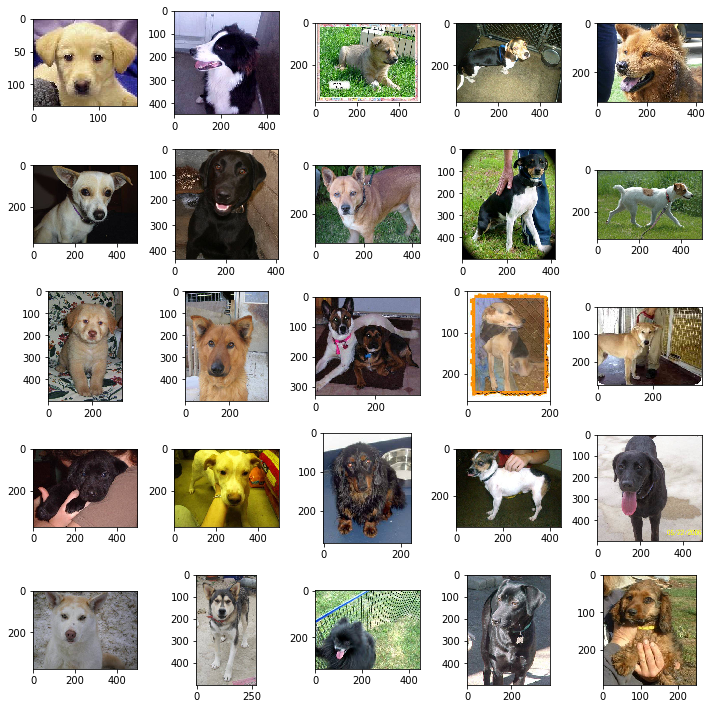

In [6]:
plot_images(train_dogs_dir)

In [11]:
input_shape = (150, 150, 3)

model = Sequential ([
    Conv2D(32, (3, 3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
     
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid' )
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [0]:
train_datagen =ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size =20,
        class_mode='binary')


validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size =20,
        class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=130,
      epochs=7,
      validation_data=validation_generator,
      validation_steps=130,
      verbose=2

)

Epoch 1/7
Epoch 1/7
130/130 - 32s - loss: 0.6802 - acc: 0.5696
130/130 - 127s - loss: 0.6888 - acc: 0.5373 - val_loss: 0.6802 - val_acc: 0.5696
Epoch 2/7
Epoch 1/7
130/130 - 32s - loss: 0.6492 - acc: 0.6346
130/130 - 126s - loss: 0.6483 - acc: 0.6242 - val_loss: 0.6492 - val_acc: 0.6346
Epoch 3/7
Epoch 1/7
130/130 - 32s - loss: 0.6058 - acc: 0.6804
130/130 - 126s - loss: 0.6182 - acc: 0.6527 - val_loss: 0.6058 - val_acc: 0.6804
Epoch 4/7
Epoch 1/7
130/130 - 32s - loss: 0.6164 - acc: 0.6542
130/130 - 127s - loss: 0.5848 - acc: 0.6935 - val_loss: 0.6164 - val_acc: 0.6542
Epoch 5/7
Epoch 1/7
130/130 - 32s - loss: 0.5817 - acc: 0.7158
130/130 - 127s - loss: 0.5431 - acc: 0.7208 - val_loss: 0.5817 - val_acc: 0.7158
Epoch 6/7
Epoch 1/7
130/130 - 32s - loss: 0.5567 - acc: 0.7200
130/130 - 126s - loss: 0.4788 - acc: 0.7777 - val_loss: 0.5567 - val_acc: 0.7200
Epoch 7/7
Epoch 1/7
130/130 - 32s - loss: 0.5559 - acc: 0.7546
130/130 - 126s - loss: 0.4270 - acc: 0.8077 - val_loss: 0.5559 - val_acc: